<a href="https://colab.research.google.com/github/al-foysal-tuhin/ostad_ai_engineering_course/blob/main/Module1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Titanic Dataset EDA Assignment**

# Task 1: Data Loading and Initial Inspection

In [ ]:
import pandas as pd
df = pd.read_csv("titanic.csv")
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

# Task 2: Handling Missing Values

**Cabin**

In [ ]:
cabin_mode = df['Cabin'].mode()[0]
print("Most frequent Cabin:", cabin_mode)

Most frequent Cabin: B96 B98


In [ ]:
df['Cabin'] = df['Cabin'].fillna(cabin_mode)
print(df['Cabin'].isnull().sum())

0


As most of the values seems zero in column 'cabin' the mode turns out to be 0 & will drop this code for the best practice.

Drop Column 'Cabin'

In [ ]:
df = df.drop(columns=['Cabin'])

**Embarked**

In [ ]:
mode_embarked = df['Embarked'].mode()[0]
print("Most frequent Embarked:", mode_embarked)
df['Embarked'] = df['Embarked'].fillna(mode_embarked)

Most frequent Embarked: S


**Age**

In [ ]:
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

# Task 3: Univariate Analysis Section

**Survival Rate**

Overall Survival Rate: 38.38%


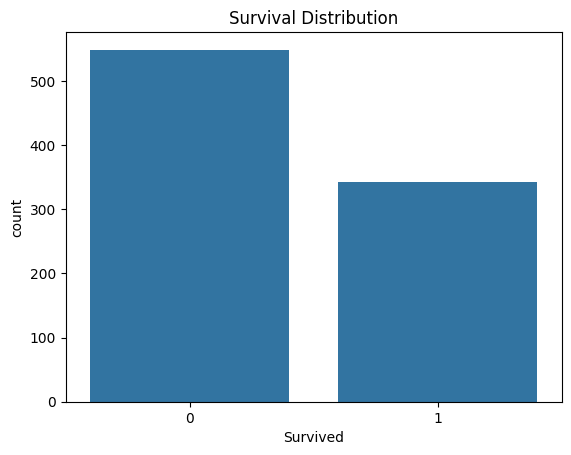

In [ ]:
survival_rate = df['Survived'].mean() * 100
print(f"Overall Survival Rate: {survival_rate:.2f}%")
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Survived', data=df)
plt.title("Survival Distribution")
plt.show()

**Passenger Class**

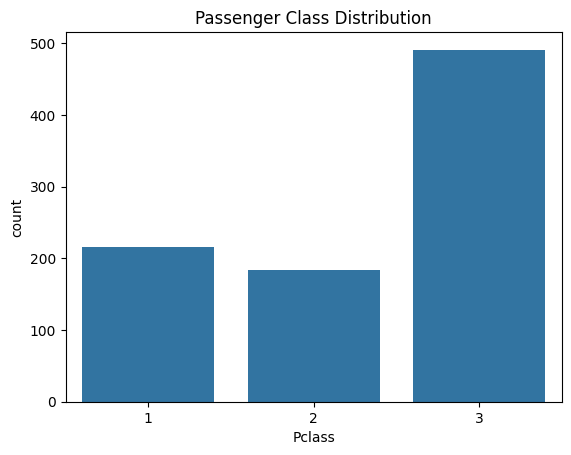

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [ ]:
sns.countplot(x='Pclass', data=df)
plt.title("Passenger Class Distribution")
plt.show()

print(df['Pclass'].value_counts())

3rd class had the most passengers.

**Age Distribution**

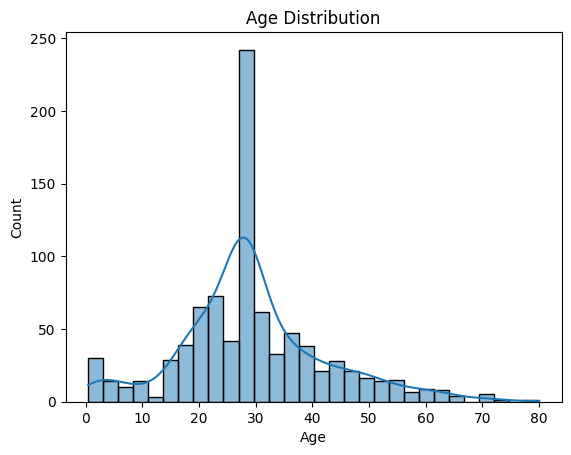

In [ ]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# Task 4: Bivariate & Multivariate Analysis

**Survival by Sex**

Survived    0    1
Sex               
female     81  233
male      468  109


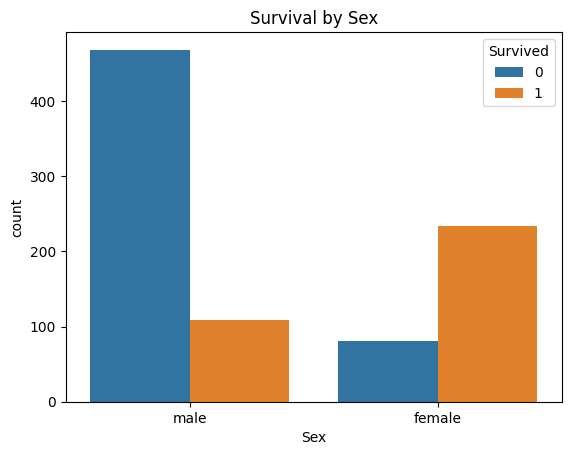

In [ ]:
print(pd.crosstab(df['Sex'], df['Survived']))

sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Sex")
plt.show()

Women had a much higher survival rate.

**Survival by Class**

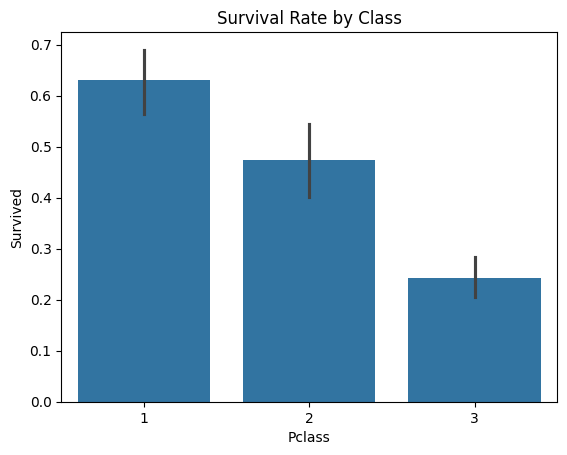

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Class")
plt.show()

1st class survival > 2nd > 3rd.

**Survival by Age**

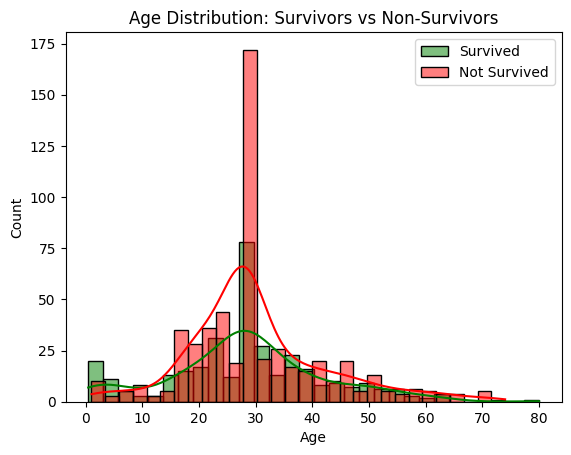

In [ ]:
sns.histplot(df[df['Survived']==1]['Age'], bins=30, color='green', label='Survived', kde=True)
sns.histplot(df[df['Survived']==0]['Age'], bins=30, color='red', label='Not Survived', kde=True)
plt.legend()
plt.title("Age Distribution: Survivors vs Non-Survivors")
plt.show()

Children had higher survival chances. Elderly survival was lower.

**Survival by Embarked**




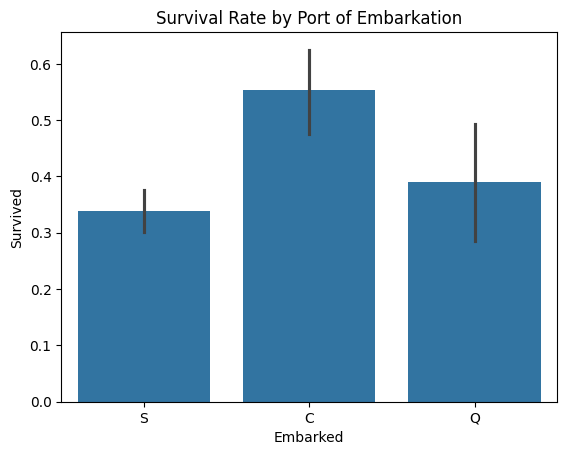

In [ ]:
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title("Survival Rate by Port of Embarkation")
plt.show()

Passengers from port C (Cherbourg) had higher survival rates.

First-class passengers had a higher chance of surviving than those in second or third class. While elderly passengers had lower survival percentages, children had higher possibilities.Compared to men, women had a much greater survival rate.